# All imports

In [1]:
import numpy as np
import uproot3
import pickle

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import Neutrino_functions

from math import *
import scipy as sci

# Loading in the MC file

In [2]:
# MC
MC_file = './data/MC_EXT_flattened.pkl'

# Data
data_file = './data/data_flattened.pkl'


MC_EXT = pd.read_pickle(MC_file)
data = pd.read_pickle(data_file)

# Here you can display the data frame

In [3]:
#Un-comment these lines to see the MC dataframe
#pd.set_option('display.max_columns', 28)
MC_EXT.head(28)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,Subevent,weight
0,124.478148,225.284348,1.286398,21,0.994485,510.146088,-19.997118,191.864334,1.0,0.977081,343.433655,35.865448,54.776821,53.900658,36.203041,342.578735,1.164239,0,0.000002
1,124.478148,7.850903,131.947891,21,0.994485,389.239197,46.669083,183.160797,0.041434,0.486446,382.998871,47.109879,178.486572,53.900658,36.203041,342.578735,1.164239,1,0.000002
2,141.086923,251.017548,0.025229,5,0.007706,766.055969,-50.159794,172.77446,1.0,0.972468,658.480286,117.427391,20.797407,20.804905,117.408989,658.495789,9999.989363,0,0.158957
3,10.511966,58.736591,10.511966,4,0.066952,213.629105,117.414757,88.746597,0.929871,0.870984,224.018387,60.914005,78.242538,78.443840,50.530334,223.597870,9999.441230,0,0.192390
4,10.511966,9.962337,3.888895,4,0.066952,235.423004,46.921162,80.265305,0.372258,0.404711,226.829147,51.903919,80.192444,78.443840,50.530334,223.597870,9999.441230,1,0.192390
5,147.929810,289.265442,0.152002,5,0.515178,1031.704712,52.0289,83.527153,1.0,0.9848,761.951172,-6.10771,1.388844,1.357146,-6.141214,761.806335,9999.934871,0,0.986006
6,96.691013,56.727428,27.846855,21,0.998477,1036.508911,-38.234692,19.931959,0.065278,0.902933,992.340698,-65.519211,22.75659,25.337120,-80.776207,969.163696,10000.275867,0,0.158957
7,96.691013,67.758522,0.264366,21,0.998477,1036.692261,-78.989571,24.593576,0.966078,0.940751,969.034668,-81.002808,25.39159,25.337120,-80.776207,969.163696,10000.275867,1,0.158957
8,96.691013,25.262609,7.398347,21,0.998477,987.487305,-65.503288,5.5114,0.082593,0.79802,972.884705,-76.234444,20.853903,25.337120,-80.776207,969.163696,10000.275867,2.0,0.158957
9,106.679589,73.540779,0.226748,5,0.040650,769.010193,110.767021,45.539276,0.950805,0.911611,759.31604,53.225922,1.124355,1.250130,53.412140,759.350220,9999.371950,0,0.194167


# Example cut on the variable 'trk_len_v'

In [4]:
def Selections(frame):

    trk_start_x_v = frame['trk_sce_start_x_v']
    trk_start_y_v = frame['trk_sce_start_y_v']
    trk_start_z_v = frame['trk_sce_start_z_v']
    trk_end_x_v = frame['trk_sce_end_x_v']
    trk_end_y_v = frame['trk_sce_end_y_v']
    trk_end_z_v = frame['trk_sce_end_z_v'] 
    reco_x = frame['reco_nu_vtx_sce_x']
    reco_y = frame['reco_nu_vtx_sce_y']
    reco_z = frame['reco_nu_vtx_sce_z']
    topological = frame['topological_score']
    trk_score_v = frame['trk_score_v']
    trk_dis_v = frame['trk_distance_v']
    trk_len_v = frame['trk_len_v']
   
    
    
    selection =  (trk_len_v > -1000) & (trk_len_v < 1000) 
    frame = frame[selection]
    
    return frame

# Calls the selection function

In [5]:
MC_EXT = Selections(MC_EXT)
data = Selections(data)

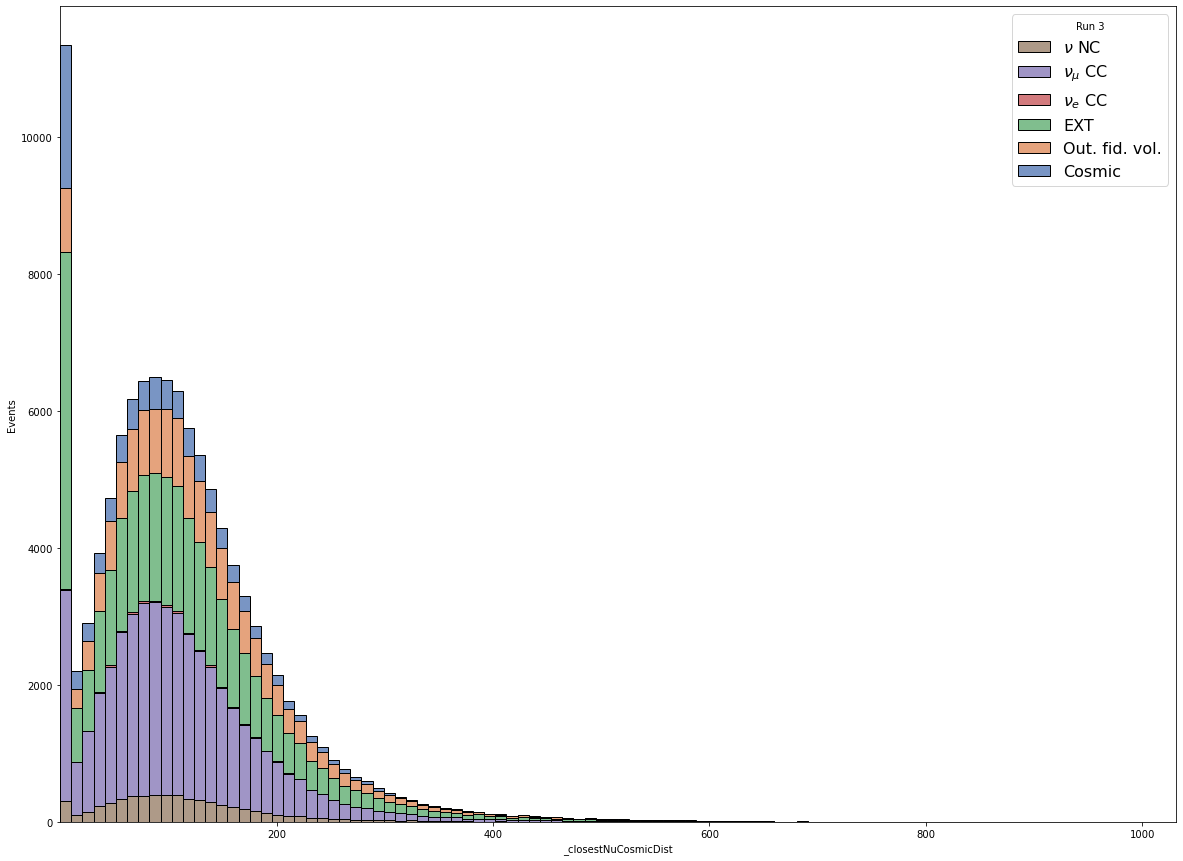

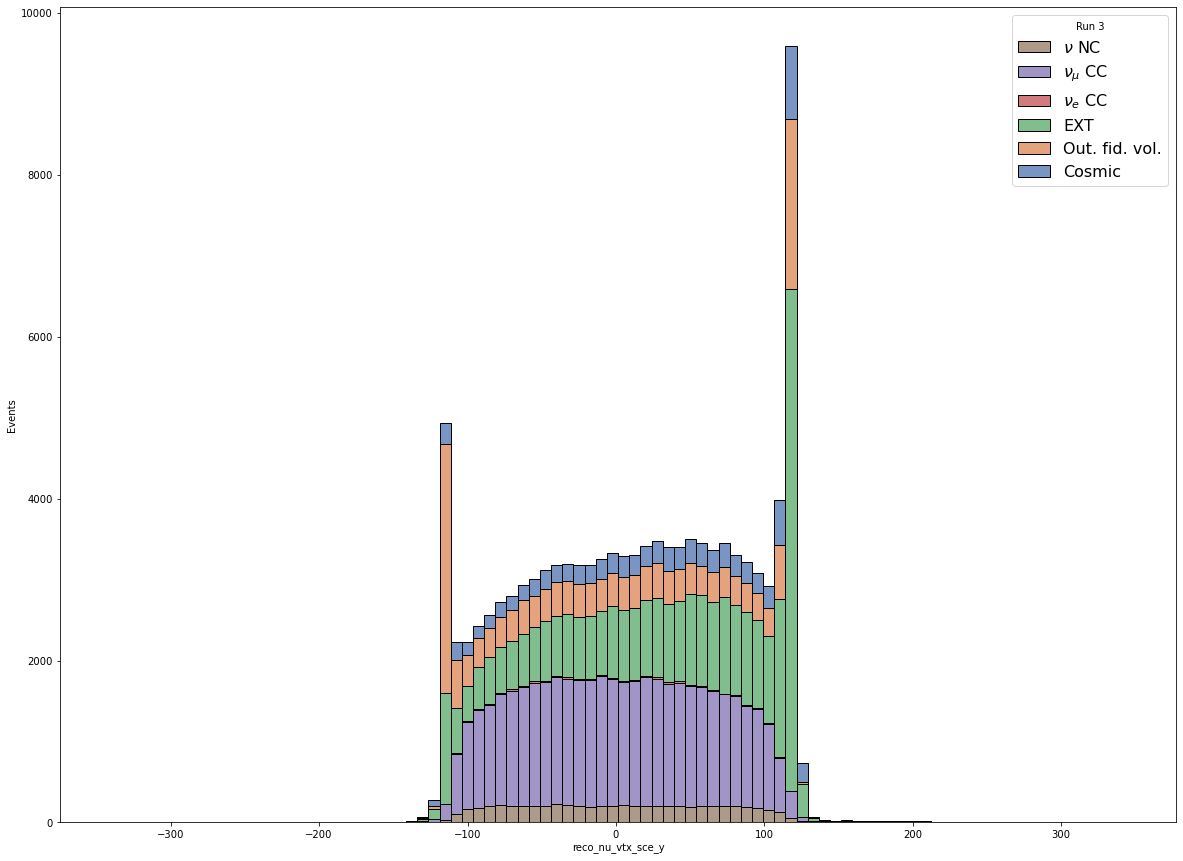

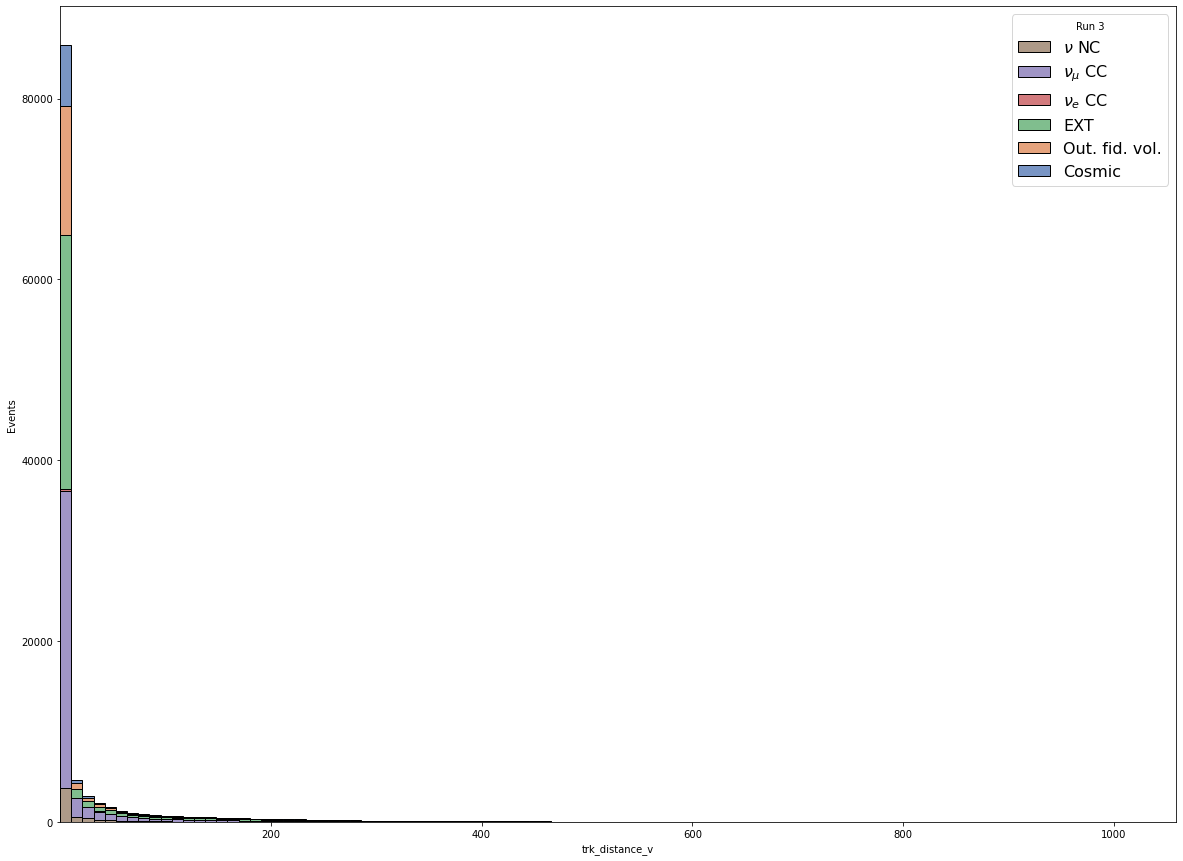

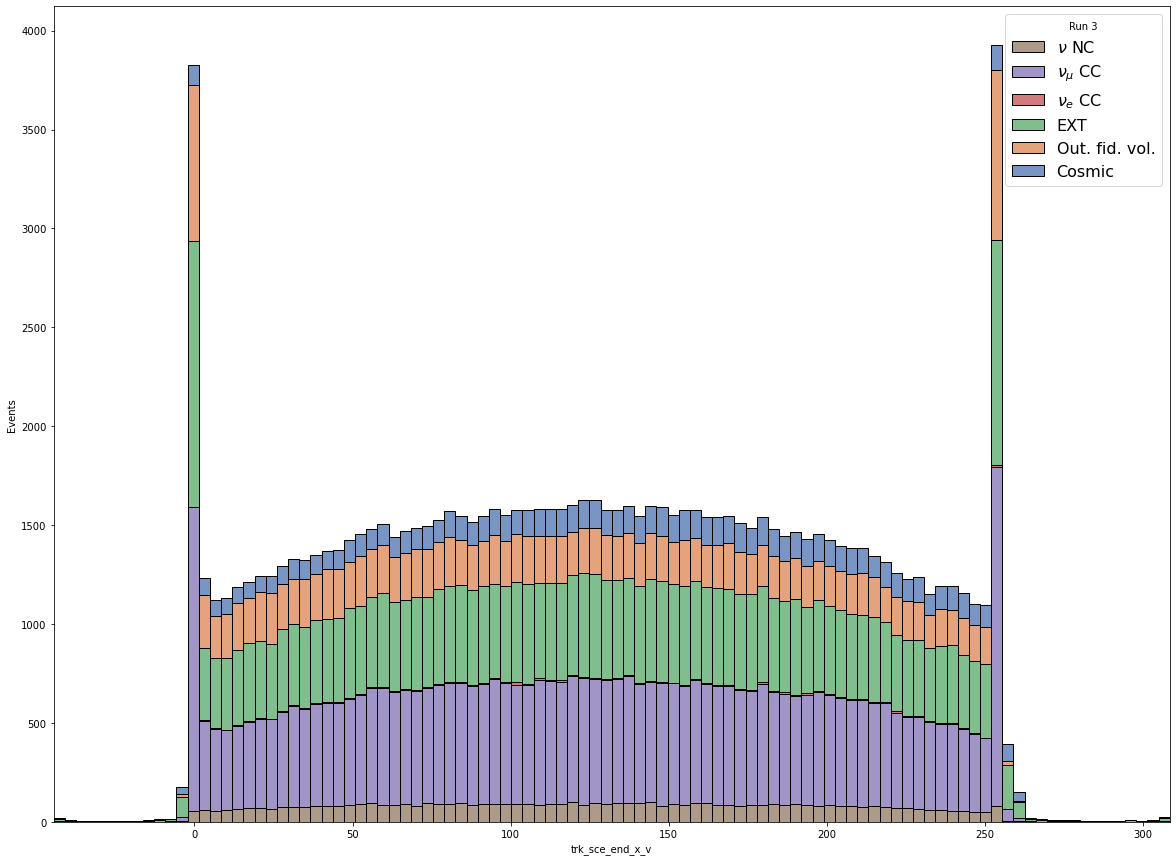

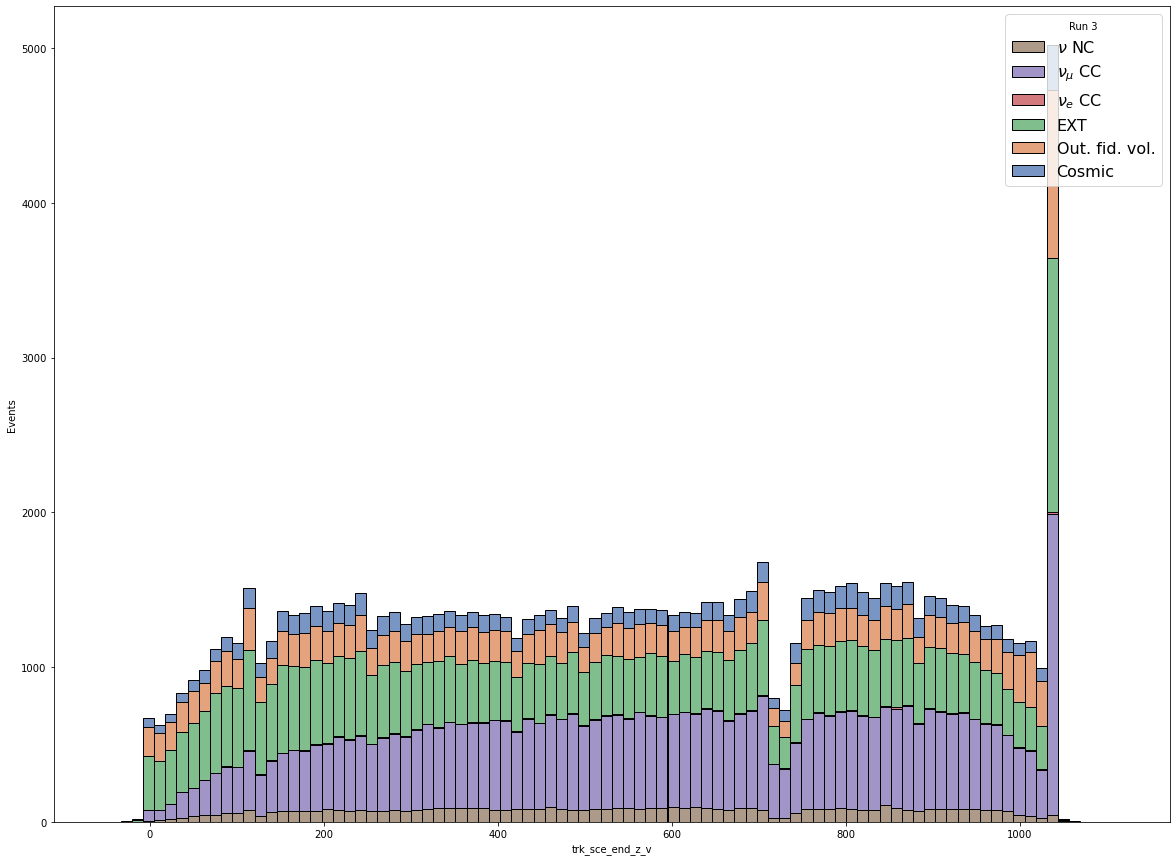

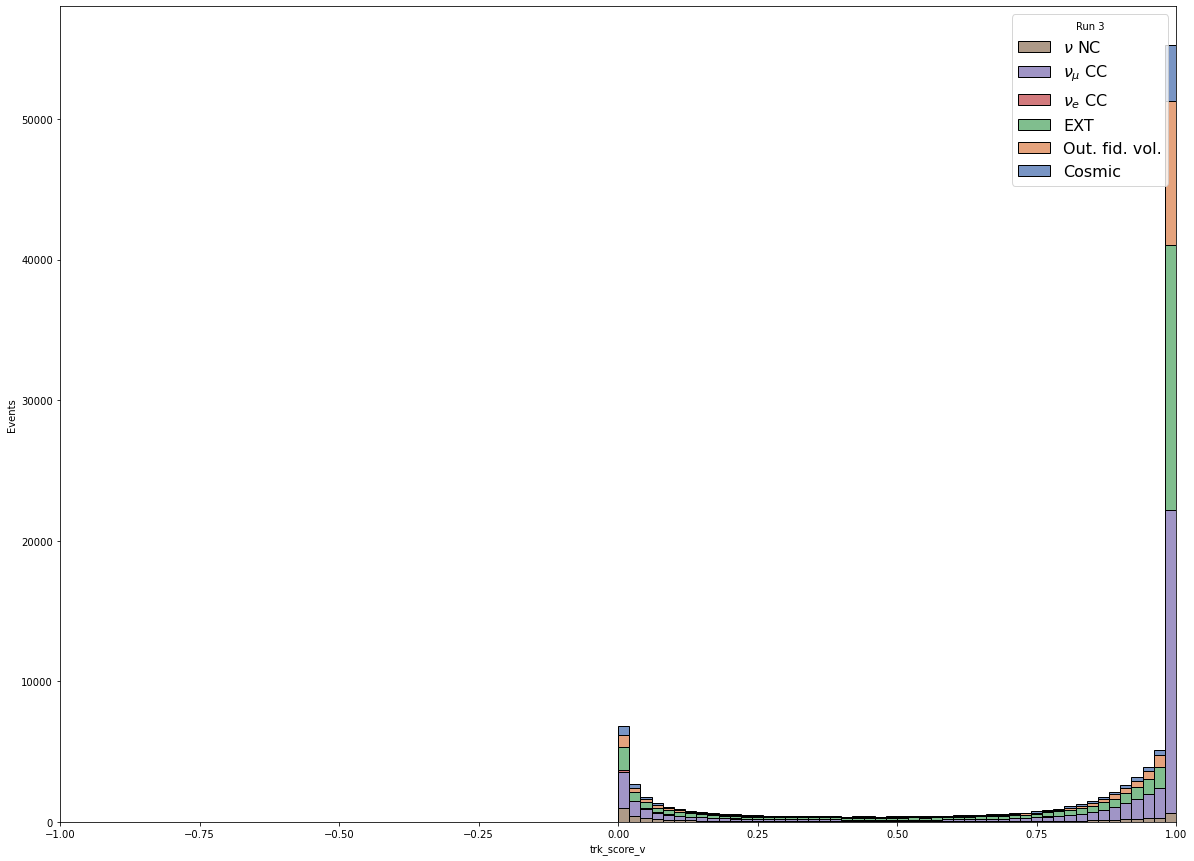

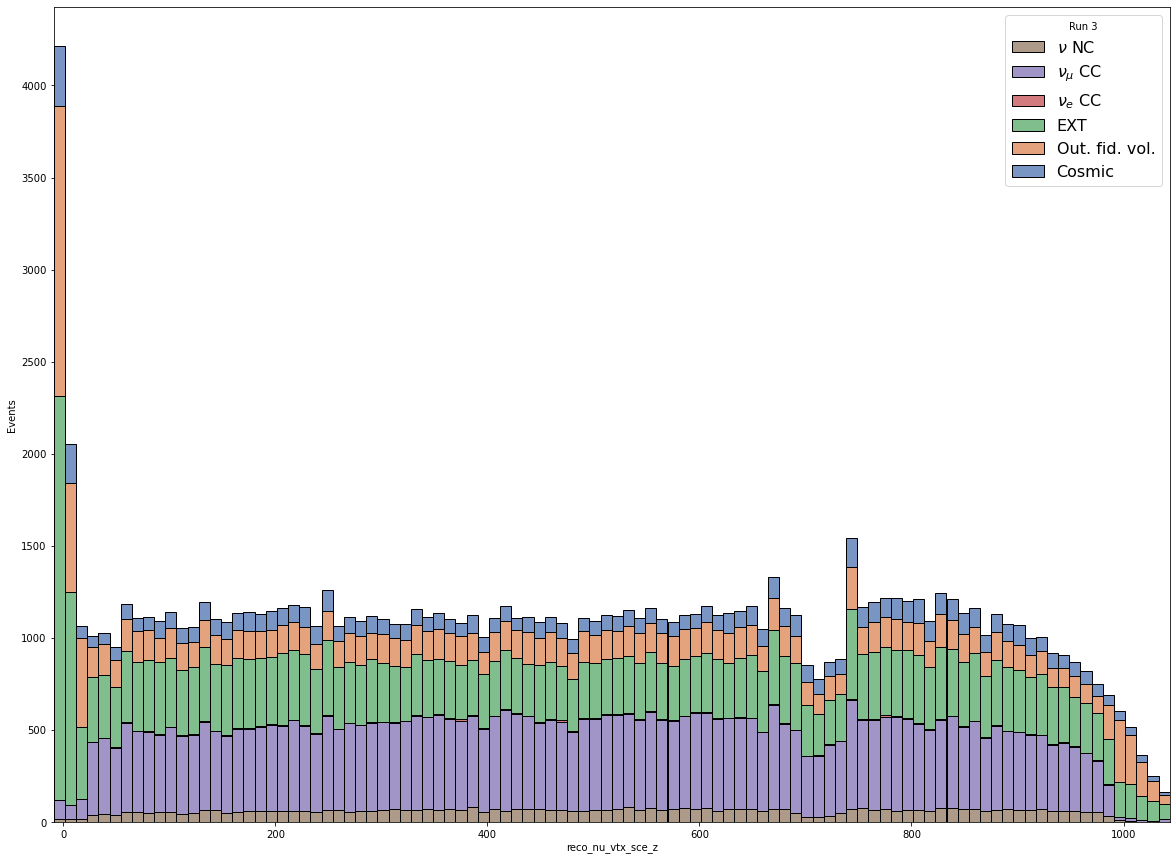

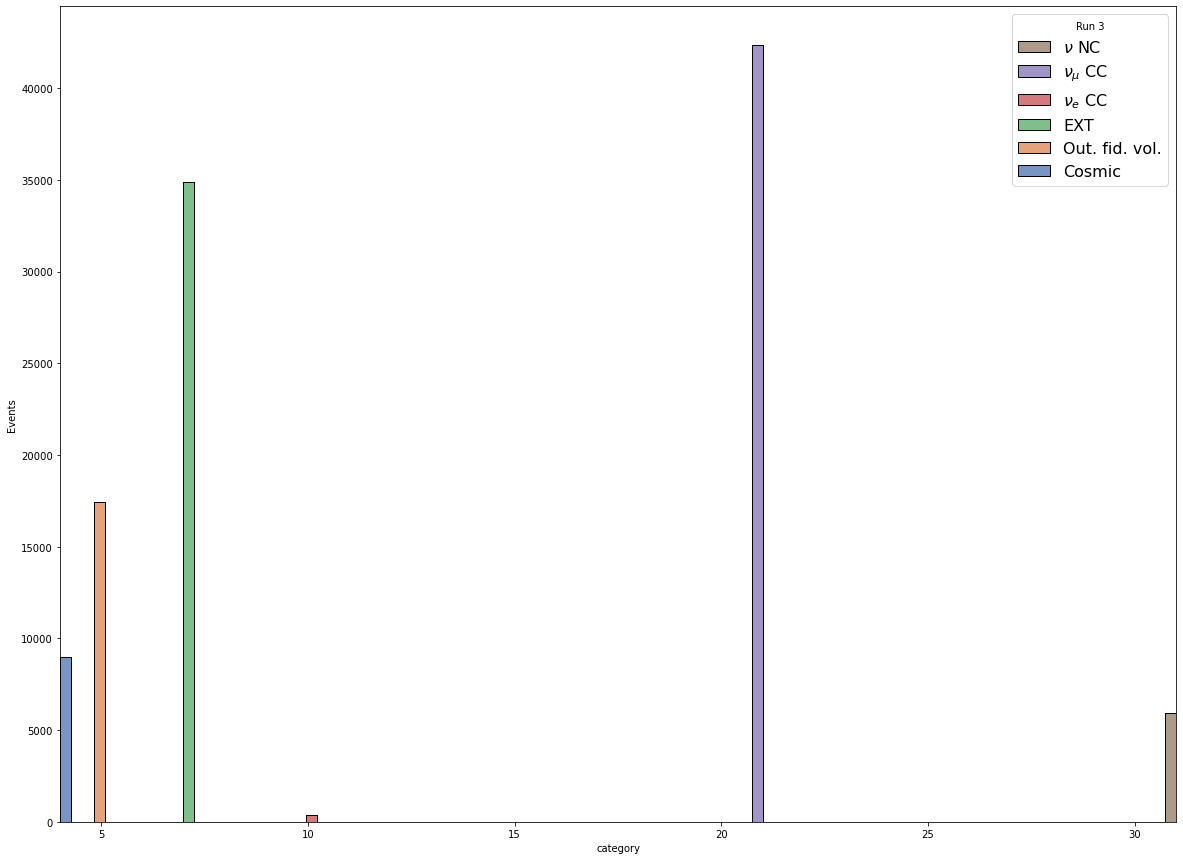

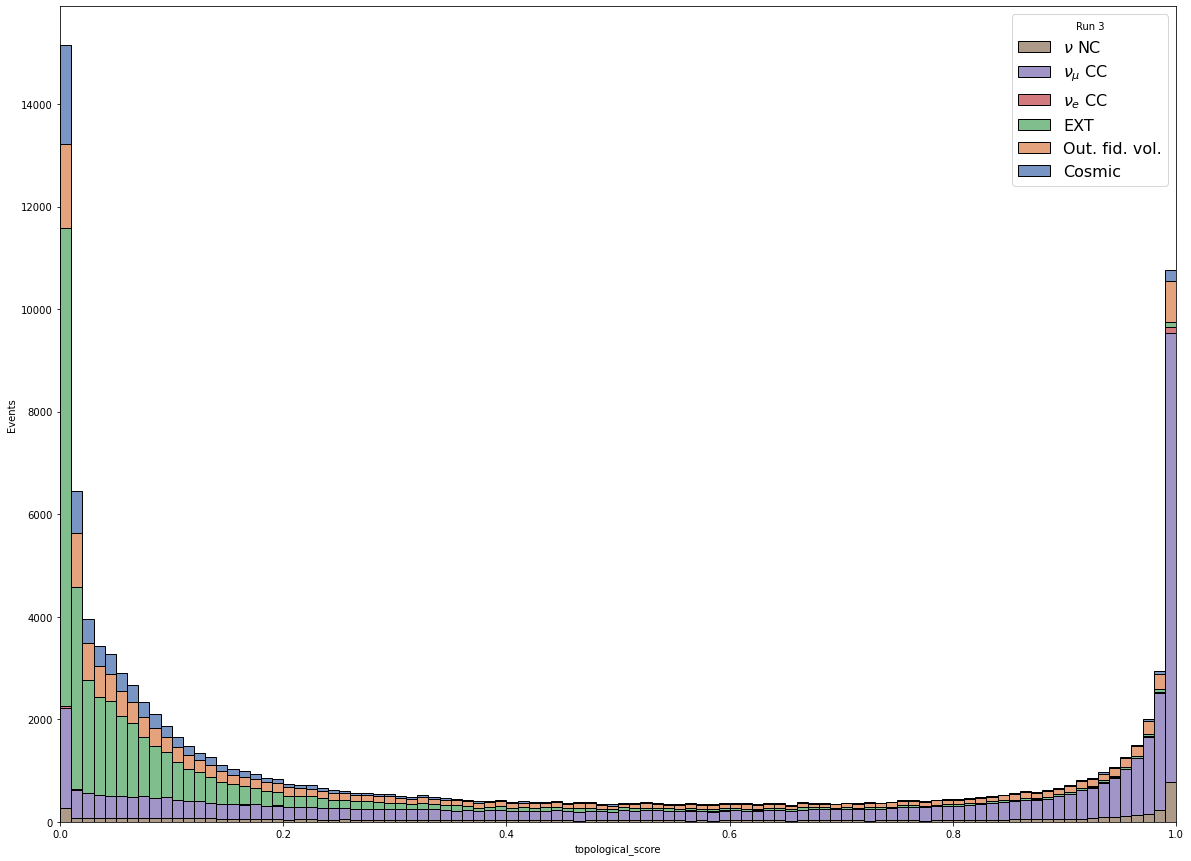

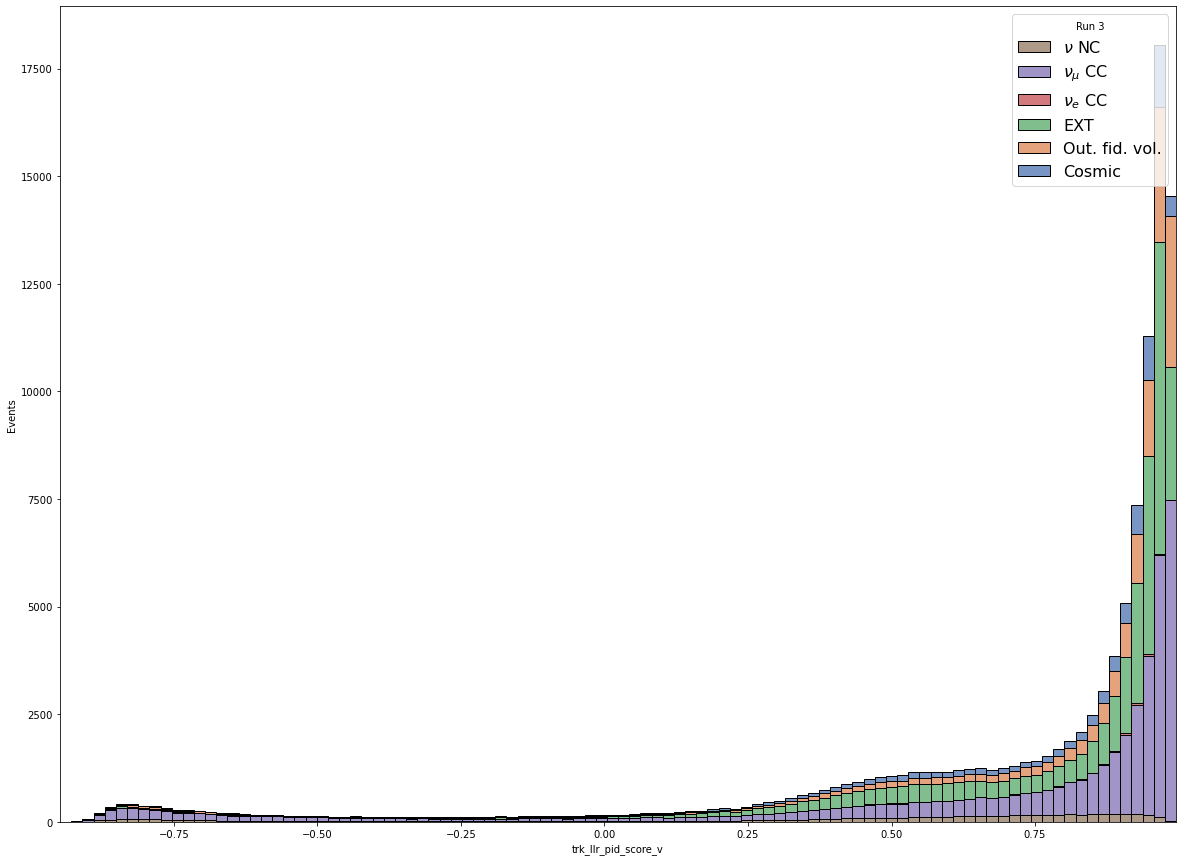

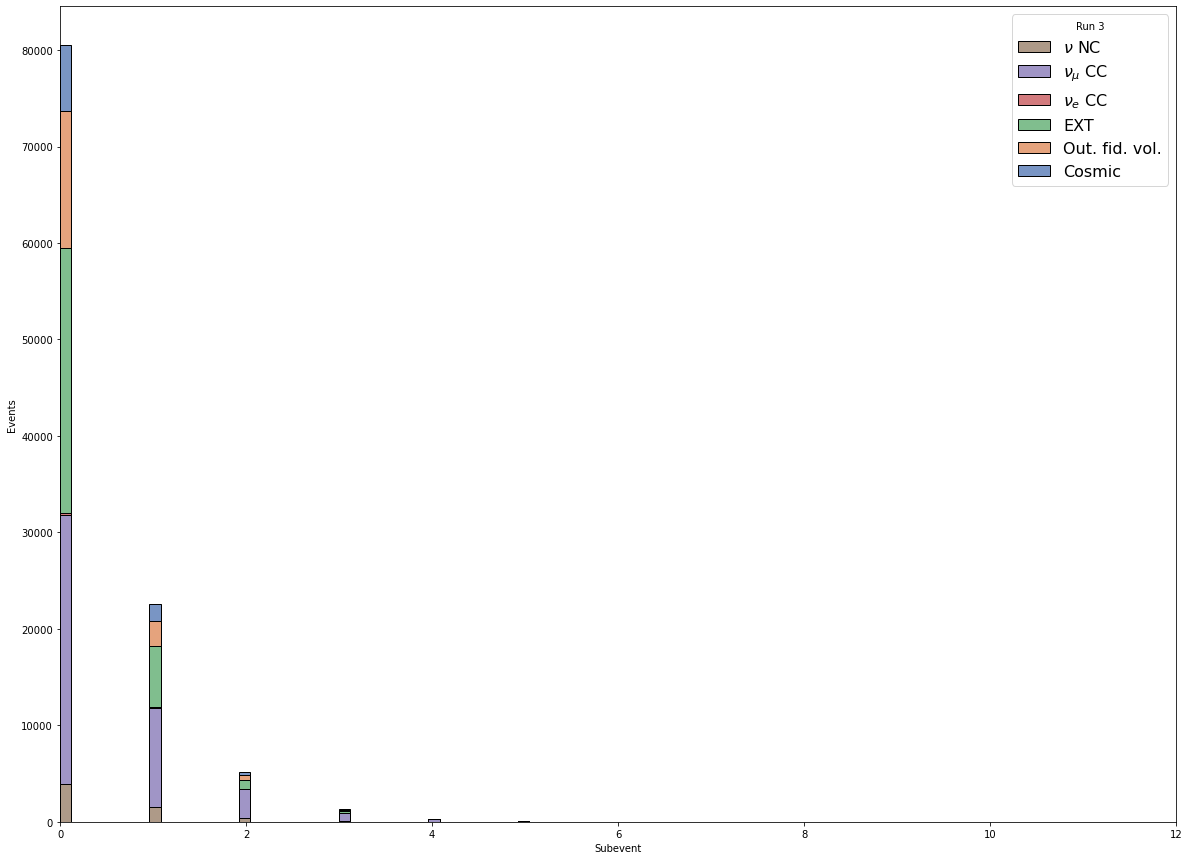

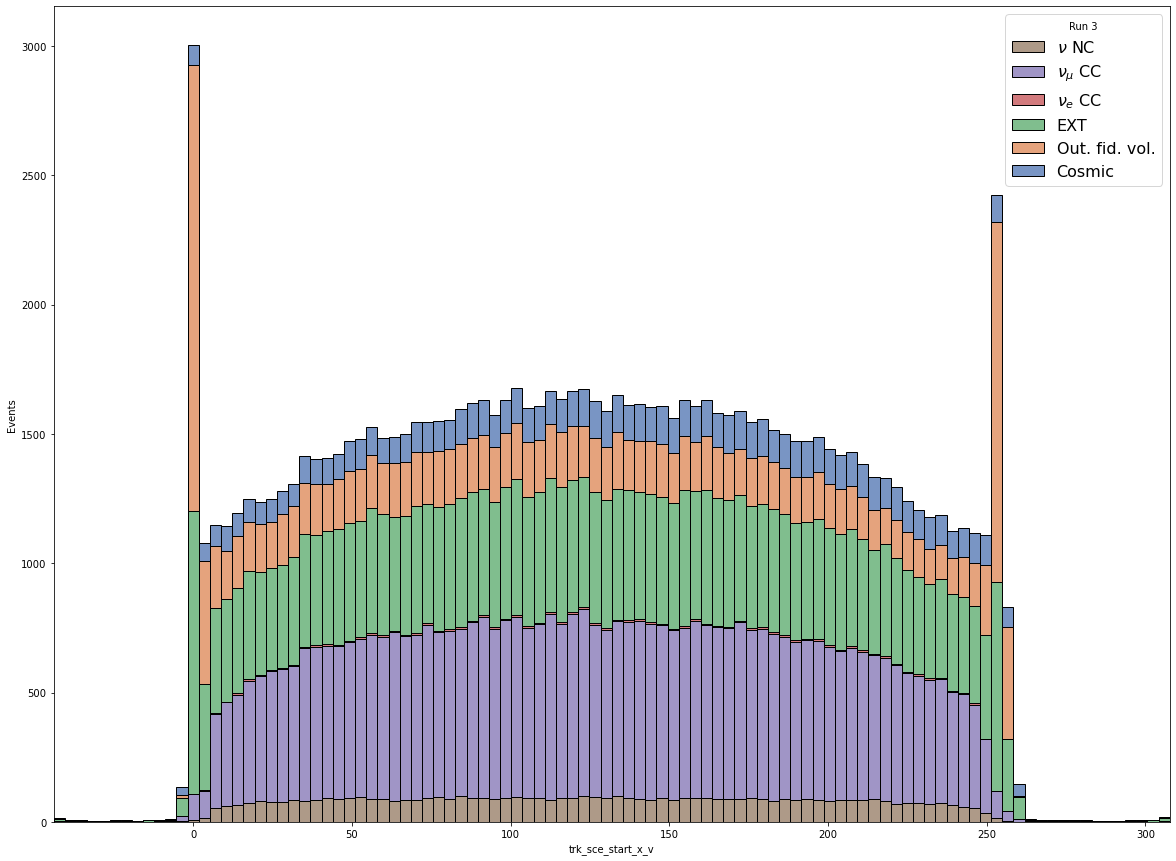

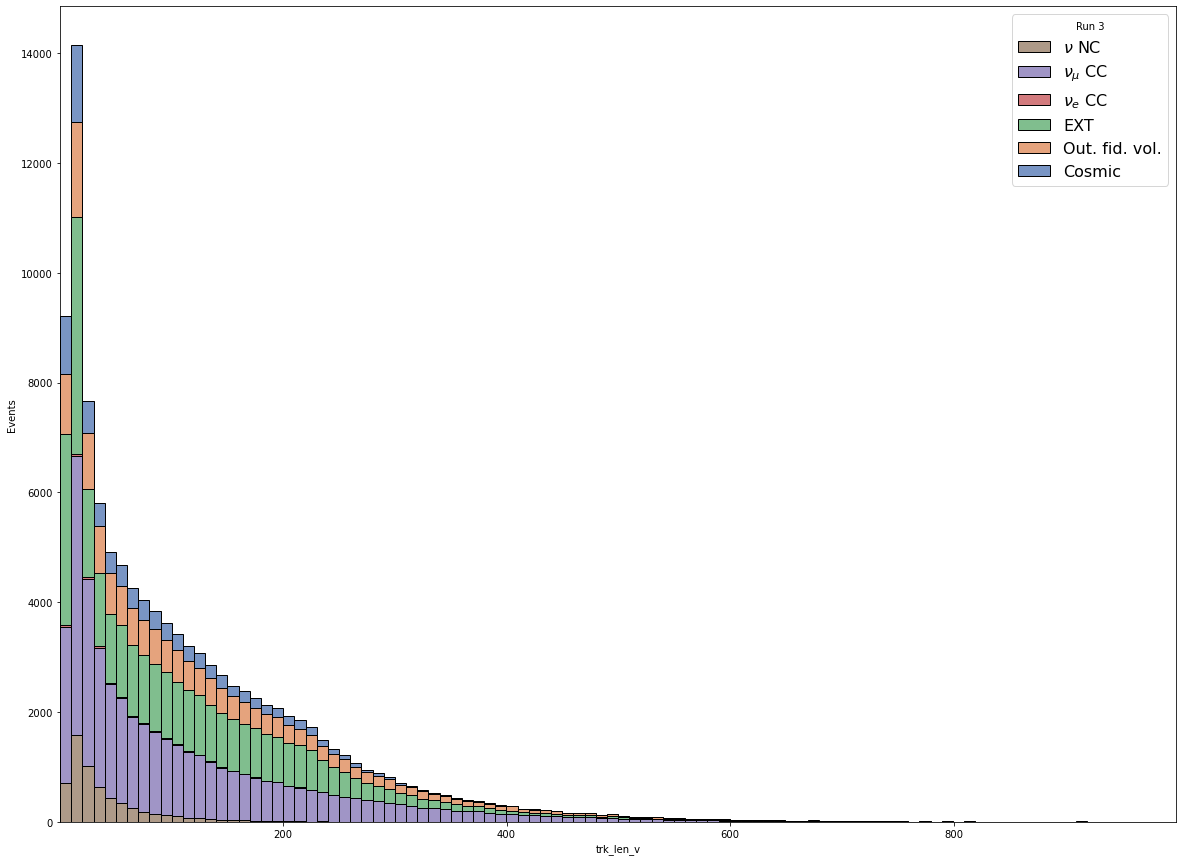

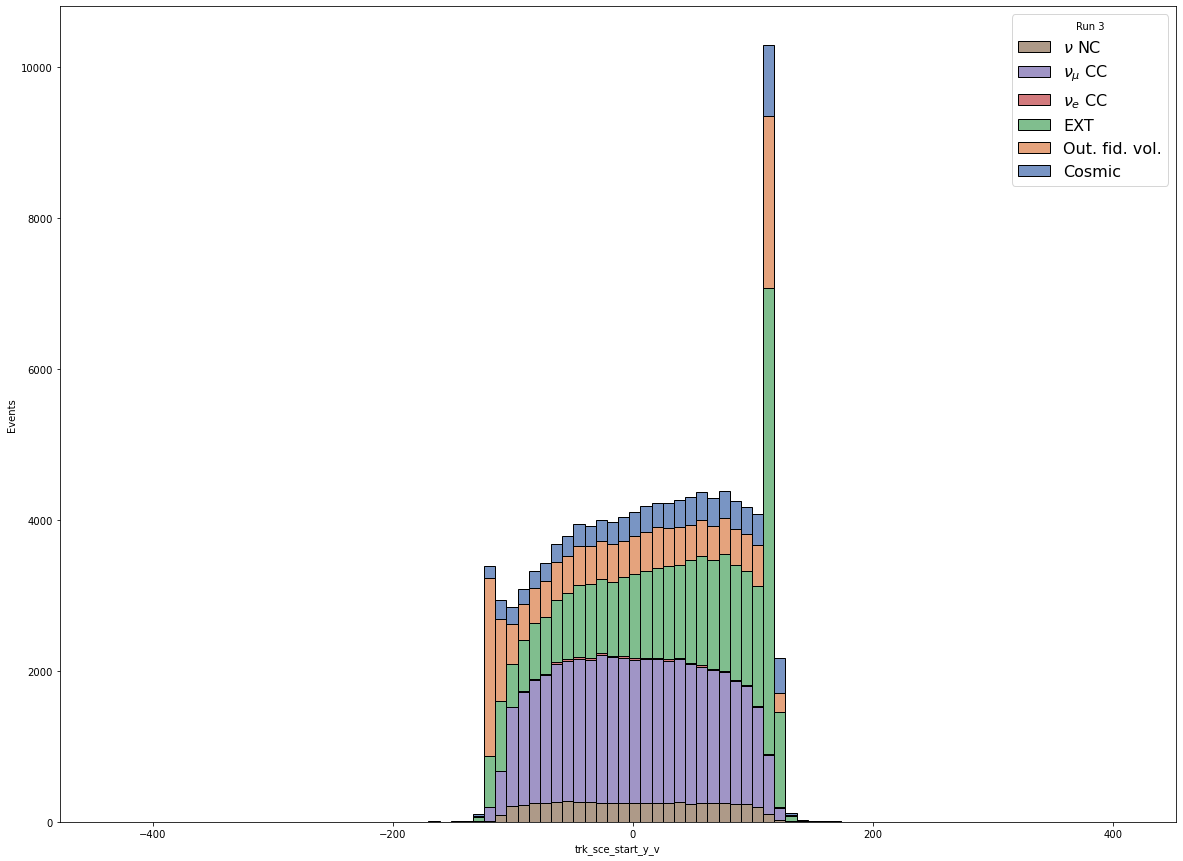

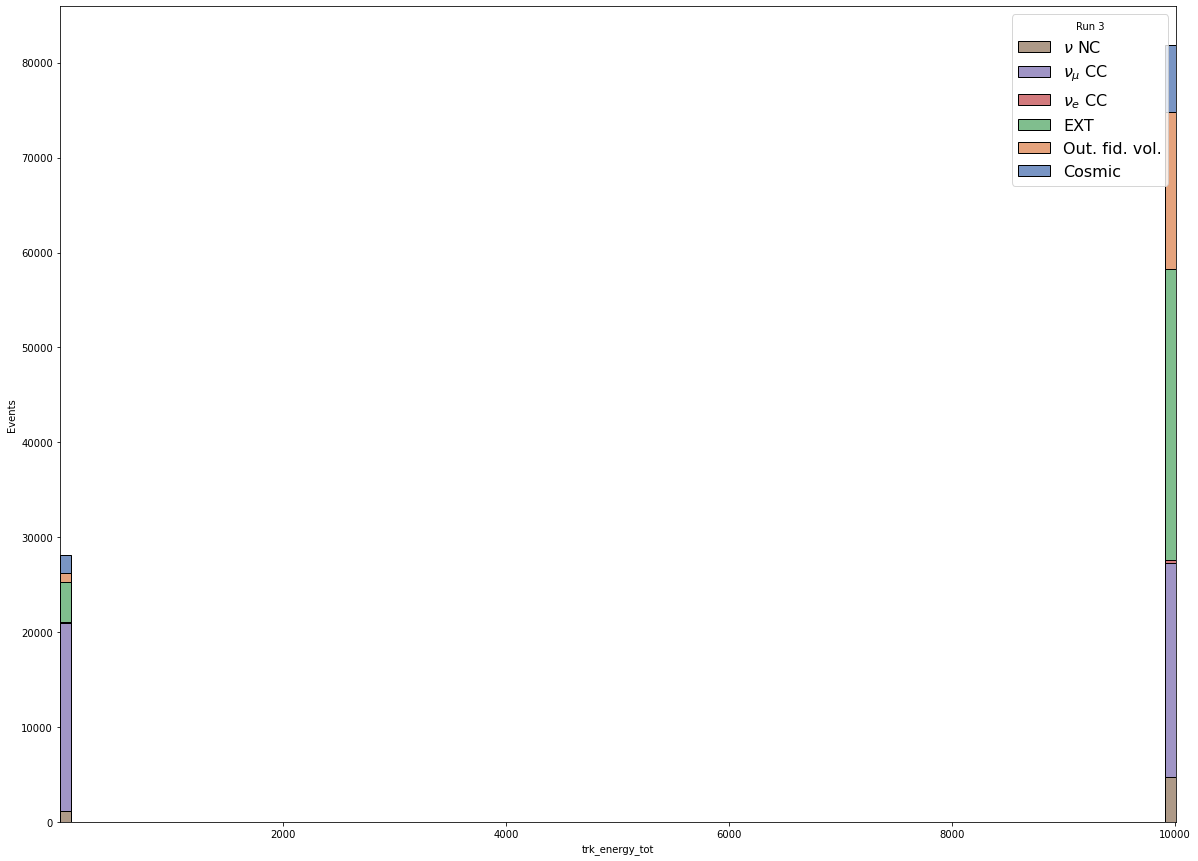

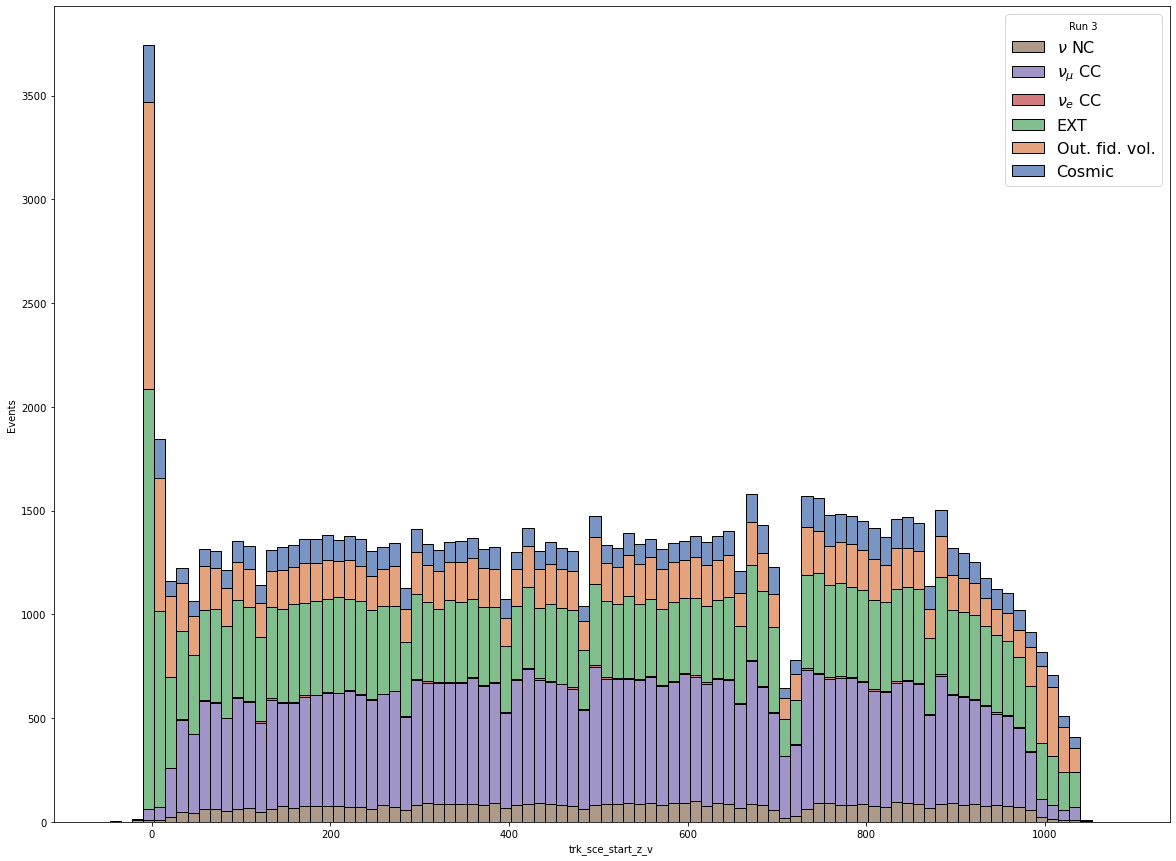

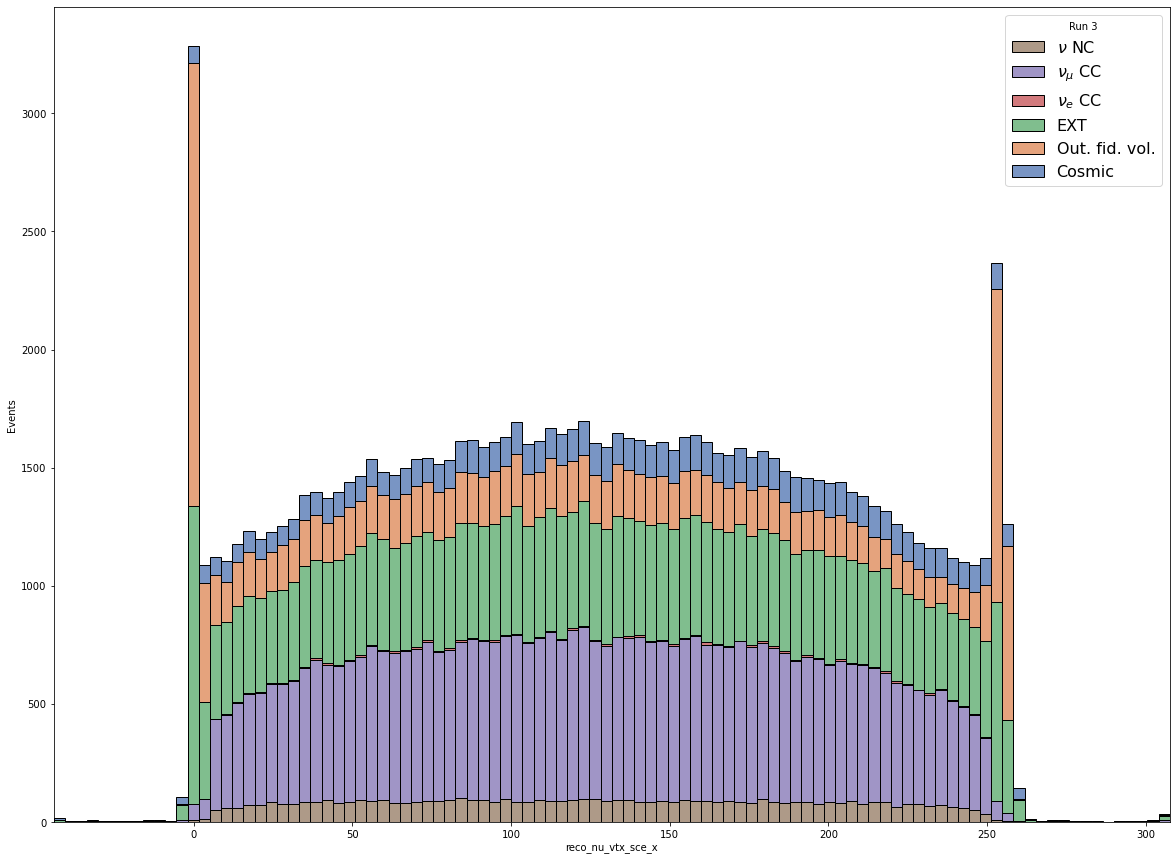

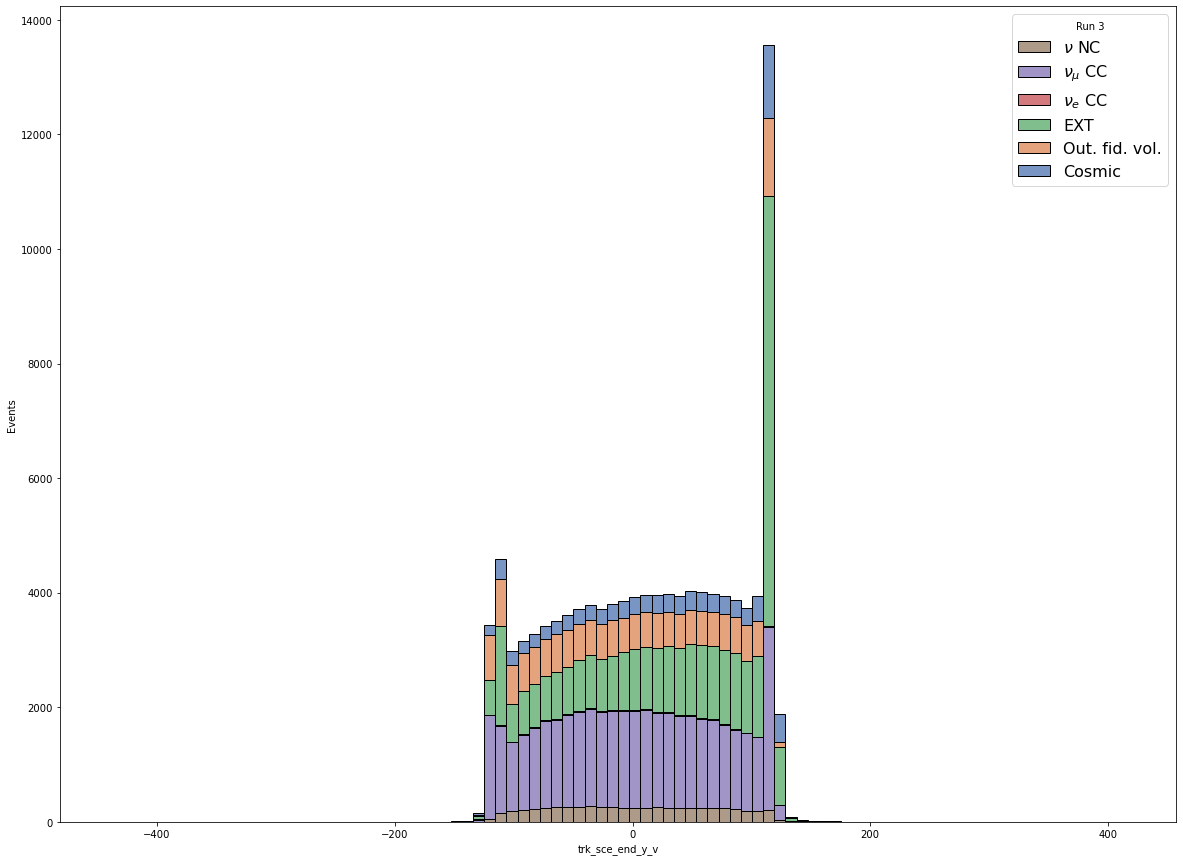

In [9]:
BIN = 100
# Common variables in both dataframes
all_variables_to_plot = list(set(list(MC_EXT)).intersection(list(data)))

for item in all_variables_to_plot:
    plt.figure(figsize=(20,15))
    i = sns.histplot(data=MC_EXT, x=item, multiple="stack", hue="category", palette = 'deep', weights = MC_EXT['weight'], bins = BIN, legend = False)
    i.set(xlabel=item, ylabel = "Events")

    #plt.yscale('log')
    plt.xlim([np.min(MC_EXT[item]), np.max(MC_EXT[item])])
    plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"Cosmic"])
    plt.show(i)

# Uncomment and run this cell to see what inputs the plotting functiont takes

In [6]:
#This command shows what input you should give the plotting function. The inputs with =None can be left out when calling the function
help(Neutrino_functions.histogram_plot)

Help on function histogram_plot in module Neutrino_functions:

histogram_plot(MC_frame, variable, bins, name, scaling, xlims=[], plot_data=False, logscale=None, dataFrame=None, Stat_func=None)
    MC_frame: pandas dataframe - MC dataframe
    variable: string - name of the variable
    bins: int - number of bins
    name: string - name of the plot. The plot is saved
    scaling: array/list - weights you want to apply on MC data
    plot_data: boolean - if True then plots data as well
    logscale: boolean - if True then y axis is log scale
    dataFrame: pandas dataframe - data dataframe



# Plot the distribution

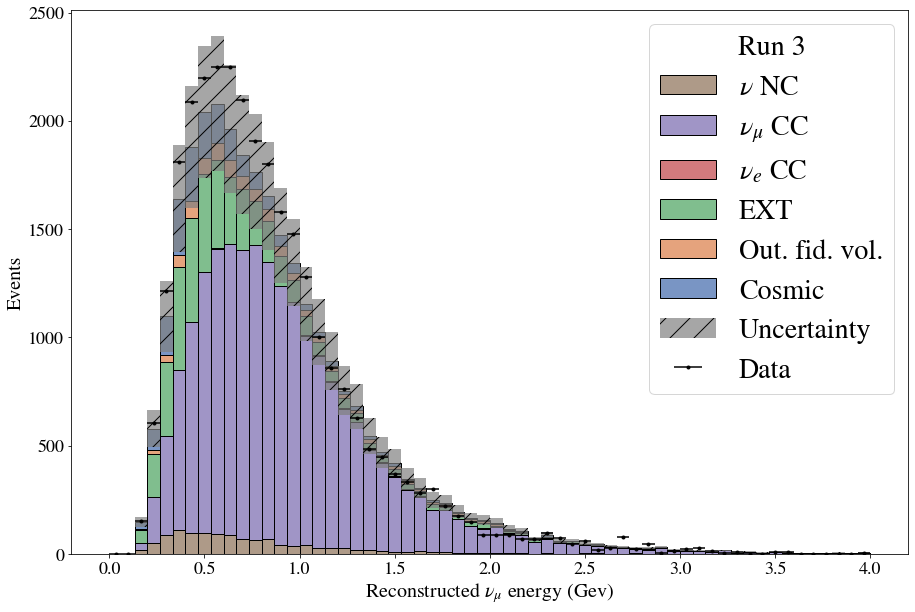

In [12]:
#Example_plot = histogram_plot(MC_EXT, 'trk_energy_tot', bins,'test', MC_EXT['weight'], (0,4), True, dataFrame = data_frame)

# example bin size
bins = 60
# set data as data_frame currently
data_frame = data


Example_plot = Neutrino_functions.histogram_plot(MC_EXT, 'trk_energy_tot', bins,'test', MC_EXT['weight'], (0,4), True, dataFrame = data_frame)

plotting_params = {
        'font.size': 28,
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }

plt.rcParams.update(plotting_params)

In [29]:
print(type(data))
print(isinstance(data,pd.core.frame.DataFrame))
print(isinstance(data,list))

<class 'pandas.core.frame.DataFrame'>
True
False
